#Exploritory Analysys of Sales Data
###Investigating comparisons through visualizations
***

This dataset provides details of products sold at a chain of stores across various regions. 
The dataset contains are 730 Observations with 13 characteristics in the dataset:

* Order ID : A specific ID given to each product (This characteristic was not included in the majority of comparisons)
* Order Priority : Shipping priority of the product
* Order Quantity: Number of items sold
* Sales: Amount recieved for the  purchase.
* Ship Mode: Divided in two categories - Express Air and Regular Air
* Profit: Profit earned from the sale
* Customer Name: Name of the customer purchasing the products (This characteristic was not included in the majority of comparisons)
* Region: Region to which the customer is assigned by location
* Customer Segment: Divided as per the size of business
* Product Category: Divided according to the usage of the product
* Product Sub-Category: Divided according to the usage of the product
* Product Name: Name of the product (This characteristic was not included in the majority of comparisons)
* Product Container: Type of container in which the product is shipped



In [1]:

# Import the libraries to work with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset in
sales = pd.read_csv('../input/sales-store-product-details/Salesstore.csv')

# Get an idea of what the dataset contains
sales.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [2]:
# How big is the data set?
sales.shape

(730, 13)

In [3]:
# What are the columns labeled as?
sales.columns

Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')

In [4]:
# Check the counts of each row for each column
n = sales.nunique(axis=0)
  
print("No.of.unique values in each column :\n",n)

No.of.unique values in each column :
 Order_ID                571
Order_Priority            5
Order_Quantity           50
Sales                   729
Ship_Mode                 2
Profit                  727
Customer_Name           173
Region                    6
Customer_Segment          4
Product_Category          3
Product_Sub-Category     15
Product_Name            445
Product_Container         3
dtype: int64


In [5]:
# Check for any nulls
sales.isnull().sum()

Order_ID                0
Order_Priority          0
Order_Quantity          0
Sales                   0
Ship_Mode               0
Profit                  0
Customer_Name           0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub-Category    0
Product_Name            0
Product_Container       0
dtype: int64

In [6]:
# Find just numeric values in the set
numerics = sales.select_dtypes(include=np.number)
print(numerics.columns)

Index(['Order_ID', 'Order_Quantity', 'Sales', 'Profit'], dtype='object')


In [7]:
# Describe what the numeric data shows us
numerics.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000,730.000000
mean,29721.597260,24.857534,1502.777653,207.479233
std,17350.560439,14.182970,2893.936648,878.631028
min,35.000000,1.000000,8.600000,-4437.910000
25%,14479.000000,13.000000,171.098375,-77.132500
50%,29350.500000,25.000000,438.700000,0.035000
75%,44978.500000,37.000000,1480.855000,180.000000
max,59909.000000,50.000000,27663.920000,8417.570000


In [8]:
# Find the categorical data columns by excluding the numerics
categorical = sales.drop(columns=numerics.columns)
print(categorical.columns)

Index(['Order_Priority', 'Ship_Mode', 'Customer_Name', 'Region',
       'Customer_Segment', 'Product_Category', 'Product_Sub-Category',
       'Product_Name', 'Product_Container'],
      dtype='object')


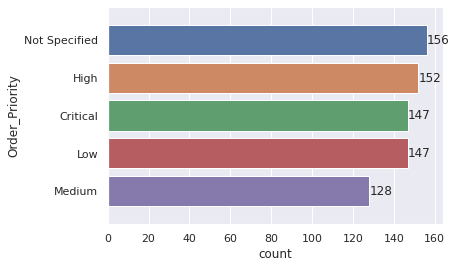

In [9]:
# Check each of the categorical counts
# Order Priority
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=sales.Order_Priority, data=sales, order=sales.Order_Priority.value_counts().index)
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [10]:
# Does not seem to be a major difference in priority from what I can see so far.

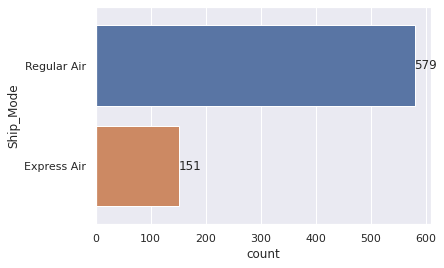

In [11]:
# Ship Mode
ax = sns.countplot(y=sales.Ship_Mode, data=sales, order=sales.Ship_Mode.value_counts().index)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [12]:
# What percentage of each is recorded?
print(sales.Ship_Mode.value_counts('Regular Air'))

Regular Air    0.793151
Express Air    0.206849
Name: Ship_Mode, dtype: float64


###79% of the shipmode is Regular Air.

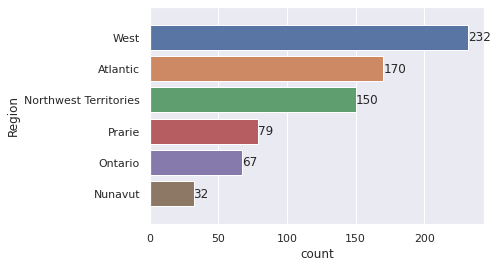

In [13]:
# Customer name may not be relevant here, so skipping over this.
# Region
ax = sns.countplot(y=sales.Region, data=sales, order=sales.Region.value_counts().index)
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

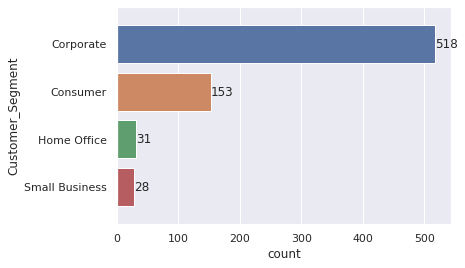

In [14]:
# Customer Segment
ax = sns.countplot(y=sales.Customer_Segment, data=sales)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

###Corporate is the vast majority of sales, while small business is the least.

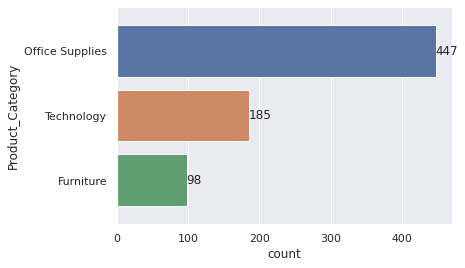

In [15]:
# Product Category

ax = sns.countplot(y=sales.Product_Category, data=sales, order=sales.Product_Category.value_counts().index)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

###Most sold are Office Supplies, and least is furniture.

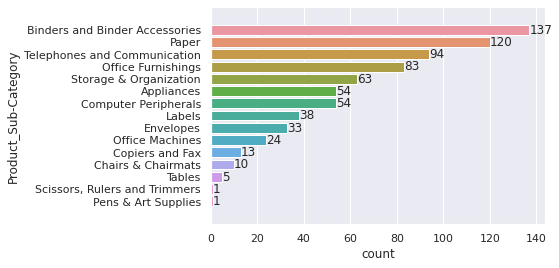

In [16]:
# Product sub category
# sns syntax didn't like the dash in the column name assignment, using simple one here
sub = sales['Product_Sub-Category']
ax = sns.countplot(y=sub, data=sales, order=sub.value_counts().index)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

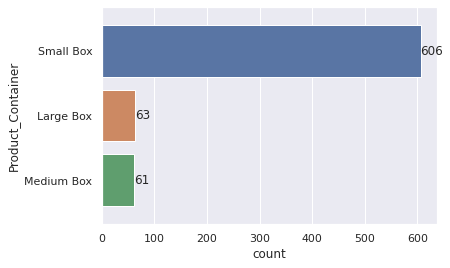

In [17]:
# Product Names - too many to really delve into with a simple figure, may need to examine this further later.
# Product Container
ax = sns.countplot(y=sales.Product_Container, data=sales, order=sales.Product_Container.value_counts().index)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [18]:
# Quantative exploration

# Order quantity
sales.Order_Quantity.describe()


count    730.000000
mean      24.857534
std       14.182970
min        1.000000
25%       13.000000
50%       25.000000
75%       37.000000
max       50.000000
Name: Order_Quantity, dtype: float64

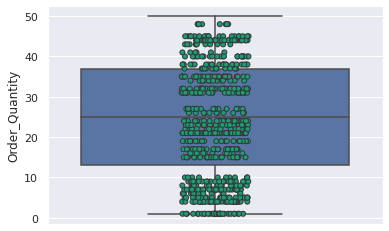

In [19]:
ax = sns.boxplot(data=sales.Order_Quantity)
ax = sns.stripplot(data=sales.Order_Quantity, y=sales.Order_Quantity, palette="Dark2", linewidth=1)

In [20]:
# Sales
sales.Sales.describe()

count      730.000000
mean      1502.777653
std       2893.936648
min          8.600000
25%        171.098375
50%        438.700000
75%       1480.855000
max      27663.920000
Name: Sales, dtype: float64

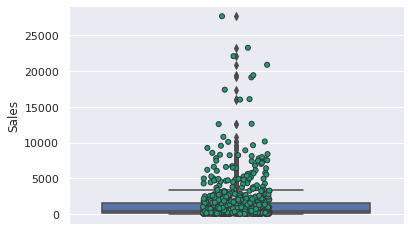

In [21]:

ax = sns.boxplot(data=sales.Sales)
ax = sns.stripplot(data=sales.Sales, y=sales.Sales, palette="Dark2", linewidth=1)

In [22]:
# Profit
sales.Profit.describe()

count     730.000000
mean      207.479233
std       878.631028
min     -4437.910000
25%       -77.132500
50%         0.035000
75%       180.000000
max      8417.570000
Name: Profit, dtype: float64

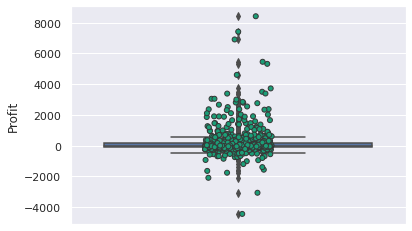

In [23]:

ax = sns.boxplot(data=sales.Profit)
ax = sns.stripplot(data=sales.Profit, y=sales.Profit, palette="Dark2", linewidth=1)

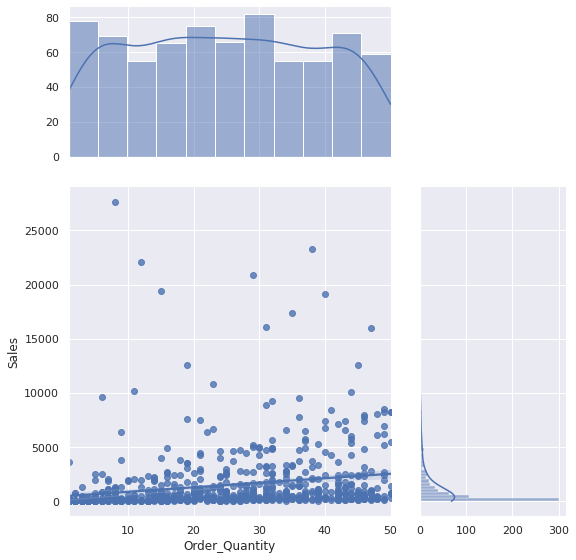

In [24]:
#Numeric Comparisons
#Order Quantity vs. Sales
ax = sns.jointplot(data=sales, x=sales.Order_Quantity, y=sales.Sales, height=8, ratio=2, marginal_ticks=True, kind="reg")

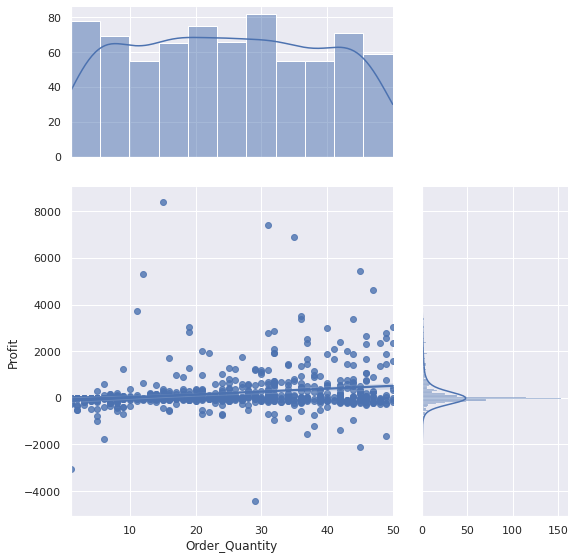

In [25]:
#Order Quantity vs Profit
ax = sns.jointplot(data=sales, x=sales.Order_Quantity, y=sales.Profit, height=8, ratio=2, marginal_ticks=True, kind="reg")

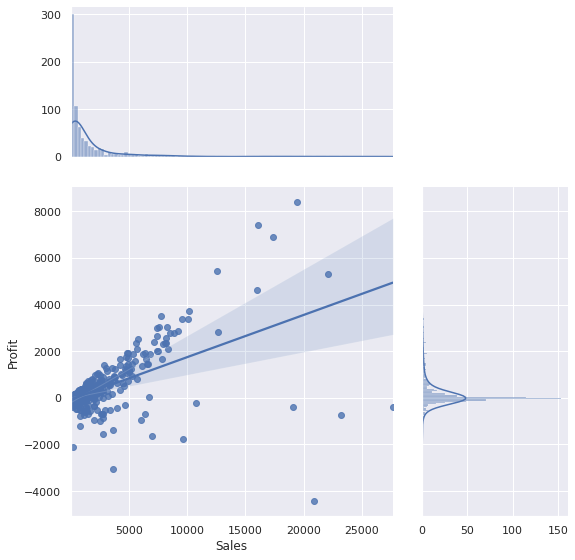

In [26]:
# Sales vs. Profit
ax = sns.jointplot(data=sales, x=sales.Sales, y=sales.Profit, height=8, ratio=2, marginal_ticks=True, kind="reg")

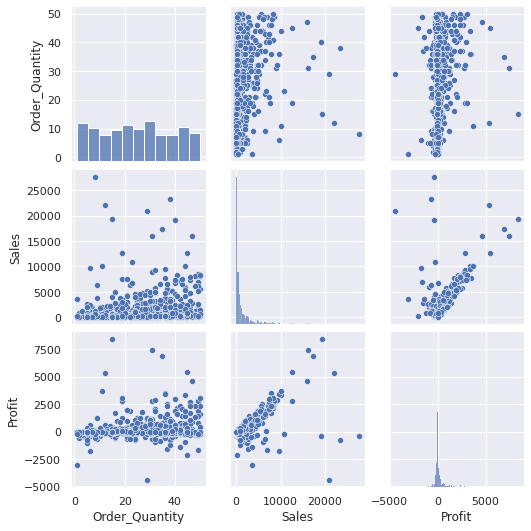

In [27]:
plotnum = numerics.drop(["Order_ID"], axis=1)
ax = sns.pairplot(plotnum)

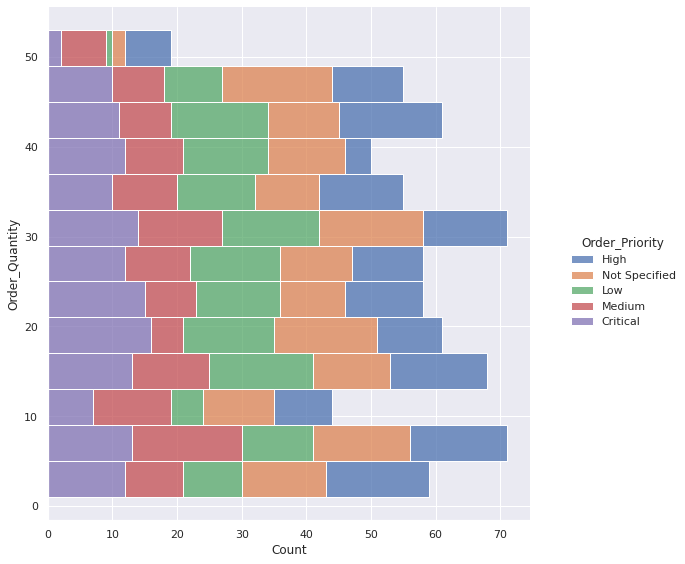

In [28]:
# Numeric vs. Categorical Comparisons
# Order Quantity vs Order Priority

ax = sns.displot(
    sales, y=sales.Order_Quantity, hue=sales.Order_Priority,
    binwidth=4, height=8, facet_kws=dict(margin_titles=True), multiple="stack")

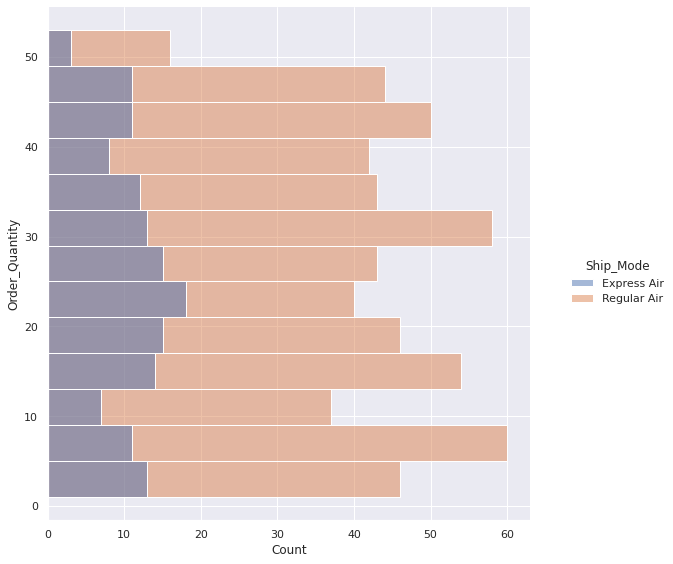

In [29]:
#Order Quantity vs. Ship Mode
ax = sns.displot(
    sales, y=sales.Order_Quantity, hue=sales.Ship_Mode,
    binwidth=4, height=8, facet_kws=dict(margin_titles=True))

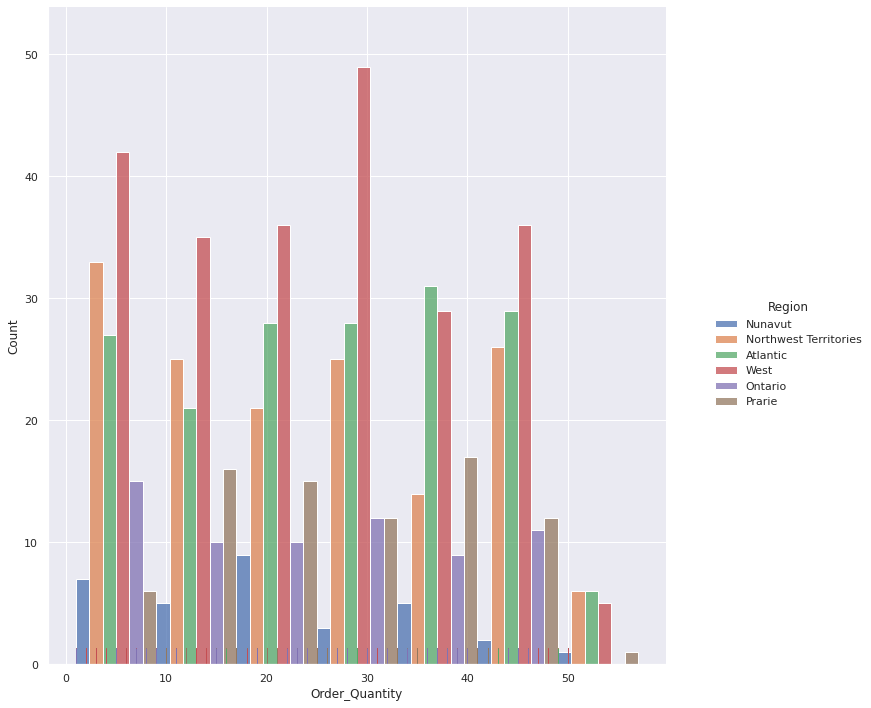

In [30]:
#Order Quantity vs. Region

ax = sns.displot(
    sales, x=sales.Order_Quantity, hue=sales.Region,
    binwidth=8, height=10, facet_kws=dict(margin_titles=True), multiple="dodge", rug=True)

###The majority of orders come from the West Region

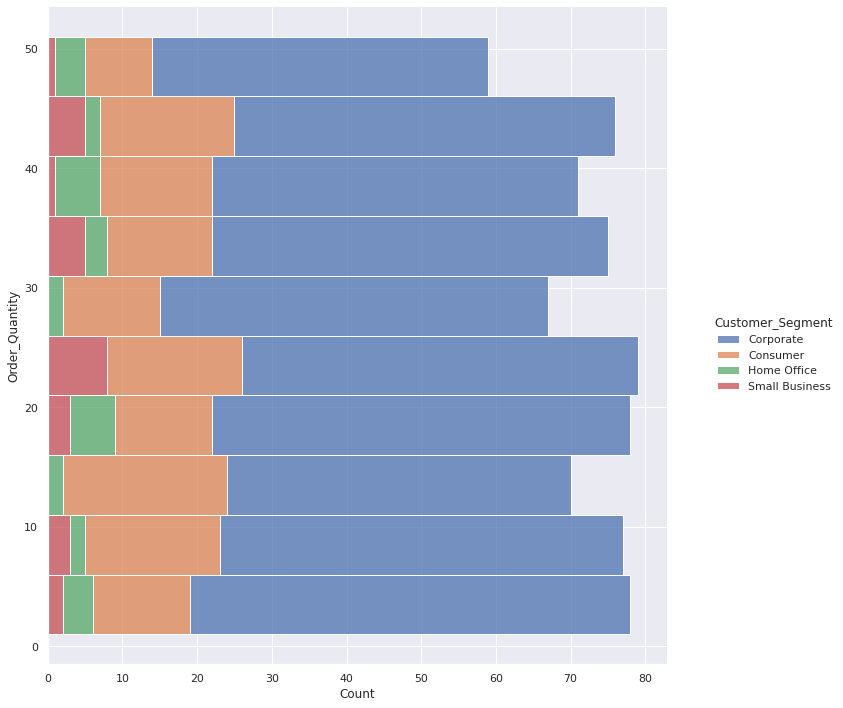

In [31]:
#Order Quantity vs. Customer Segment

ax = sns.displot(
    sales, y=sales.Order_Quantity, hue=sales.Customer_Segment,
    binwidth=5, height=10, facet_kws=dict(margin_titles=True), multiple="stack")

###Majority of Orders were from Corporate

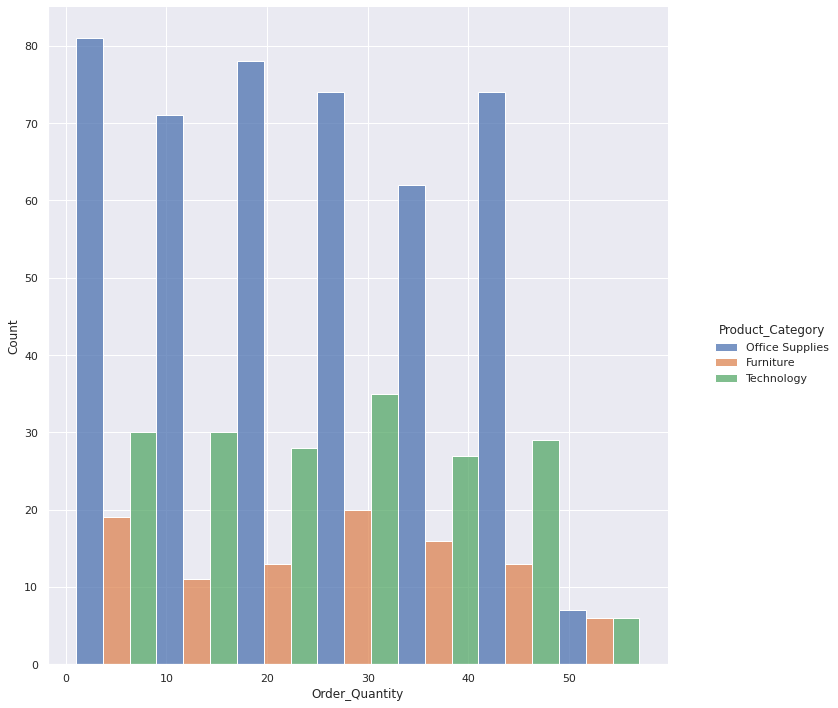

In [32]:
#Order Quantity vs. Product Category
ax = sns.displot(
    sales, x=sales.Order_Quantity, hue=sales.Product_Category,
    binwidth=8, height=10, facet_kws=dict(margin_titles=True), multiple="dodge")

###Majority of orders were for Office Supplies

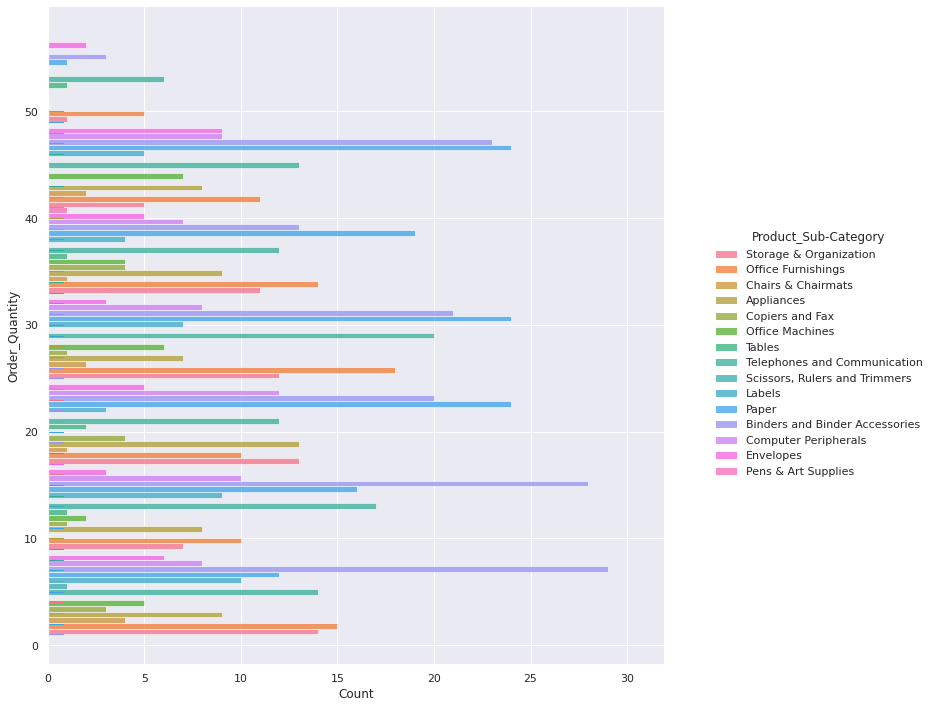

In [33]:
#Order Quantity vs. Product Sub Category
sub = sales["Product_Sub-Category"]
ax = sns.displot(
    sales, y=sales.Order_Quantity, hue=sub,
    binwidth=8, height=10, facet_kws=dict(margin_titles=True), multiple="dodge", rug=True)

###Majority of sub categories were Binders and paper

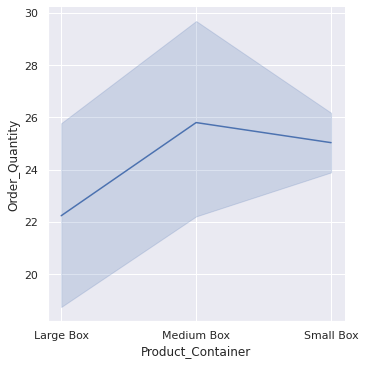

In [34]:
#Order Quantity vs. Product Container
ax = sns.relplot(x=sales.Product_Container, y=sales.Order_Quantity, data=sales, kind = 'line')

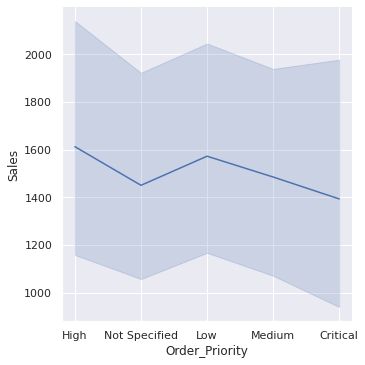

In [35]:
#Sales vs. Order Priority
ax = sns.relplot(x=sales.Order_Priority, y=sales.Sales, data=sales, kind = 'line')

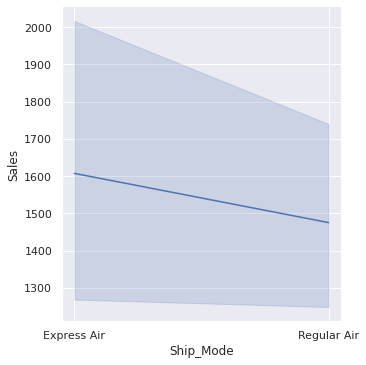

In [36]:
#Sales vs. Ship Mode
ax = sns.relplot(x=sales.Ship_Mode, y=sales.Sales, data=sales, kind = 'line')

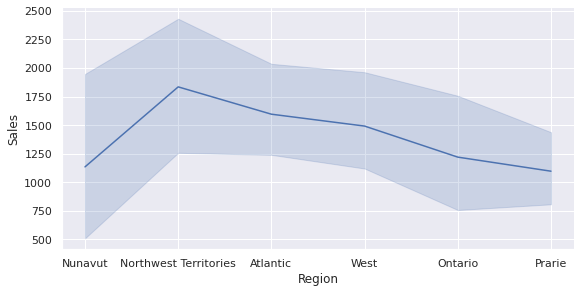

In [37]:
#Sales Vs. Region
ax = sns.relplot(x=sales.Region, y=sales.Sales, data=sales, kind = 'line', height=4, aspect=2)

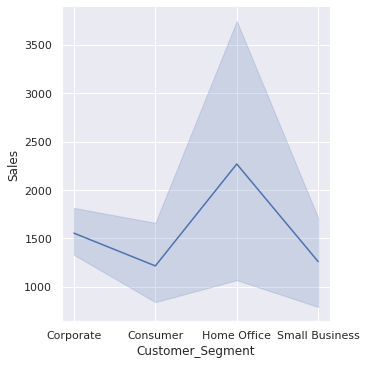

In [38]:
#Sales Vs. Customer Segment
ax = sns.relplot(x=sales.Customer_Segment, y=sales.Sales, data=sales, kind = 'line')

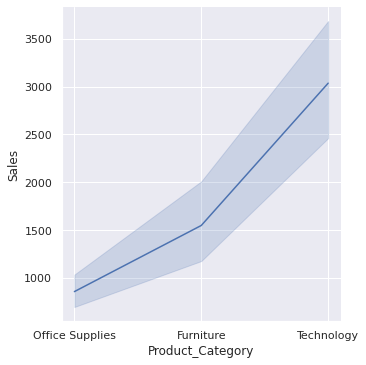

In [39]:
#Sales Vs. Product Category
ax = sns.relplot(x=sales.Product_Category, y=sales.Sales, data=sales, kind = 'line')

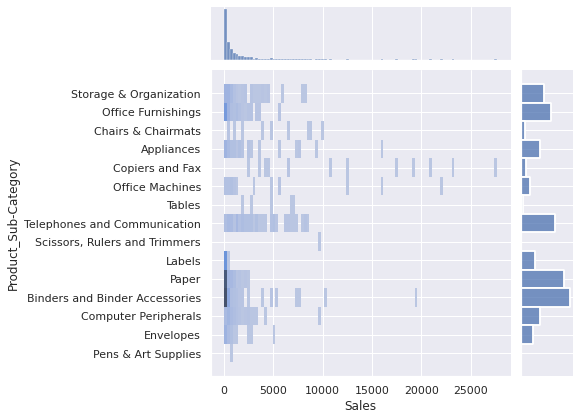

In [40]:
#Sales vs. Product Sub Category
sub=sales['Product_Sub-Category']
ax = sns.jointplot(data=sales, x=sales.Sales, y=sub, kind="hist")

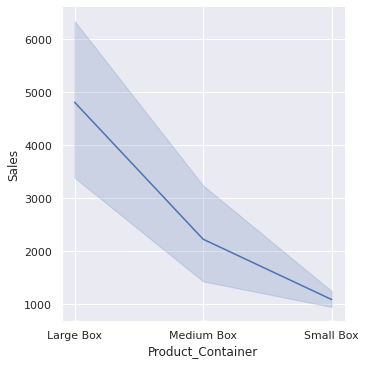

In [41]:
#Sales Vs. Product Container
ax = sns.relplot(x=sales.Product_Container, y=sales.Sales, data=sales, kind = 'line')

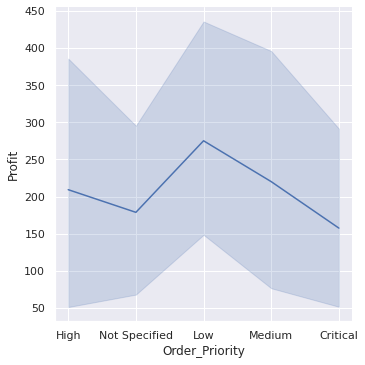

In [42]:
#Profit vs. Order Priority
ax = sns.relplot(x=sales.Order_Priority, y=sales.Profit, data=sales, kind = 'line')

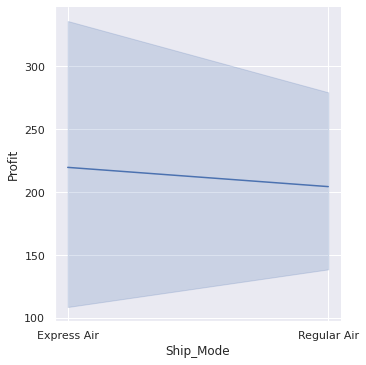

In [43]:
#Profit vs. Ship Mode
ax = sns.relplot(x=sales.Ship_Mode, y=sales.Profit, data=sales, kind = 'line')

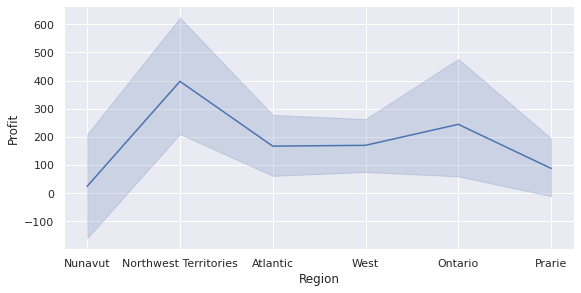

In [44]:
#Profit Vs. Region

ax = sns.relplot(x=sales.Region, y=sales.Profit, data=sales, kind = 'line', height=4, aspect=2)

In [45]:
#Highest profits were seen from Northwest Territories

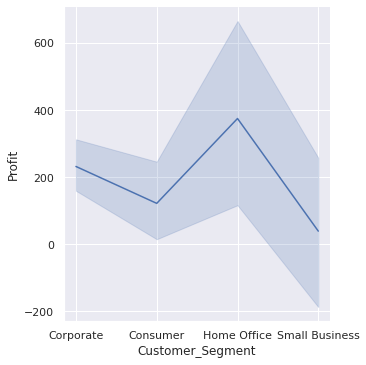

In [46]:
#Profit vs. Customer Segment
ax = sns.relplot(x=sales.Customer_Segment, y=sales.Profit, data=sales, kind = 'line')

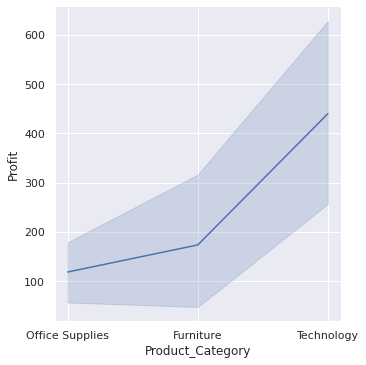

In [47]:
#Profit Vs. Product Category
ax = sns.relplot(x=sales.Product_Category, y=sales.Profit, data=sales, kind = 'line')

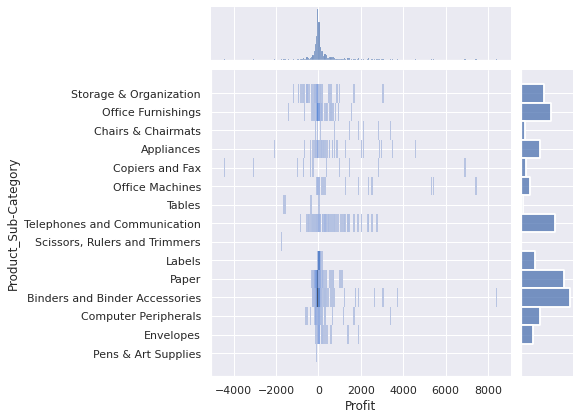

In [48]:
#Profit Vs.Product Sub Category
sub=sales['Product_Sub-Category']
ax = sns.jointplot(data=sales, x=sales.Profit, y=sub, kind="hist")

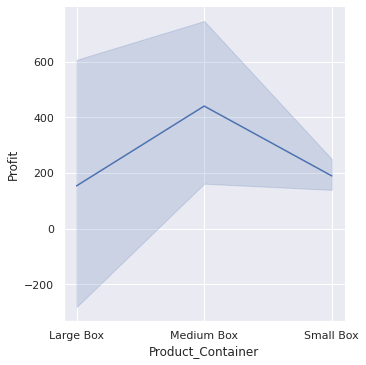

In [49]:
#Profit Vs. Product Container
ax = sns.relplot(x=sales.Product_Container, y=sales.Profit, data=sales, kind = 'line')

##Observations so far:
* 79% of the shipmode is Regular Air.
* The majority of orders come from the West Region
* Majority of Orders were from Corporate
* Majority of orders were for Office Supplies
* Majority of sub categories were Binders and paper
* Majority were small boxes
* Highest profits were seen from Northwest Territories

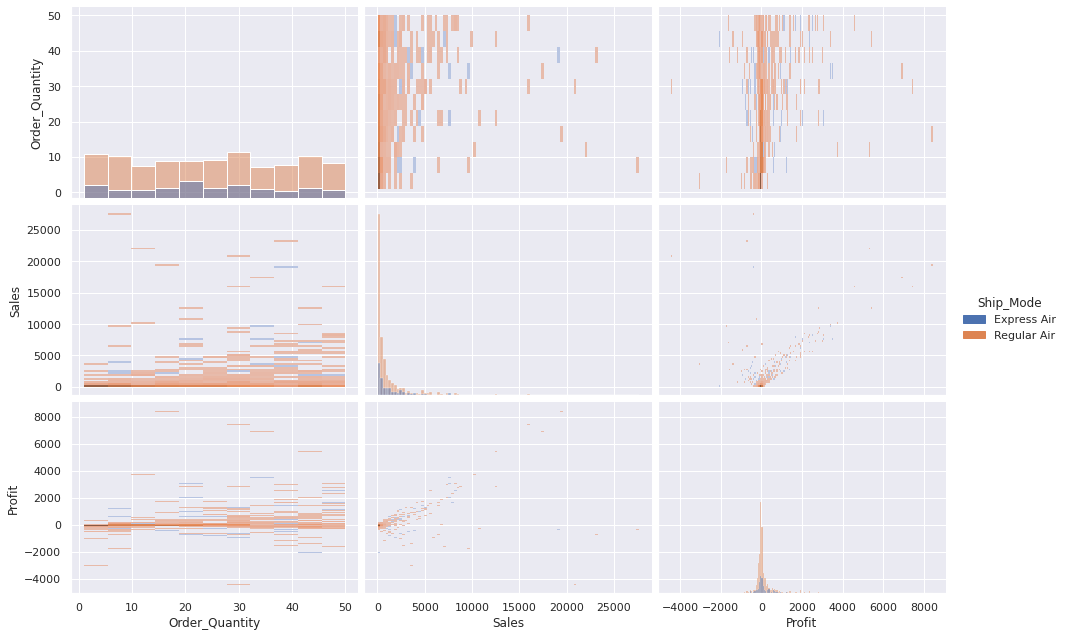

In [50]:
# 79% of the shipmode is Regular Air.
#Pairwise Ship Mode
pairnums = sales.drop(columns=['Order_ID'])
ax = sns.pairplot(data=pairnums, kind="hist", hue="Ship_Mode", height=3, aspect=1.5)

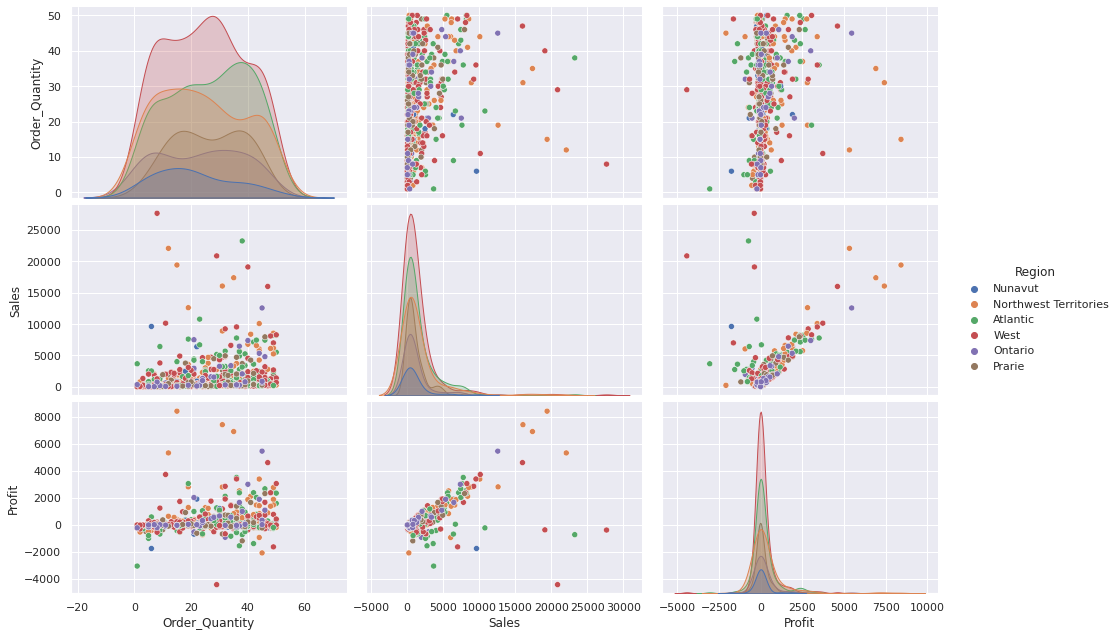

In [51]:
#The majority of orders come from the West Region
#Highest profits were seen from Northwest Territories
#Pairwise Region
ax = sns.pairplot(data=pairnums, hue="Region", height=3, aspect=1.5)

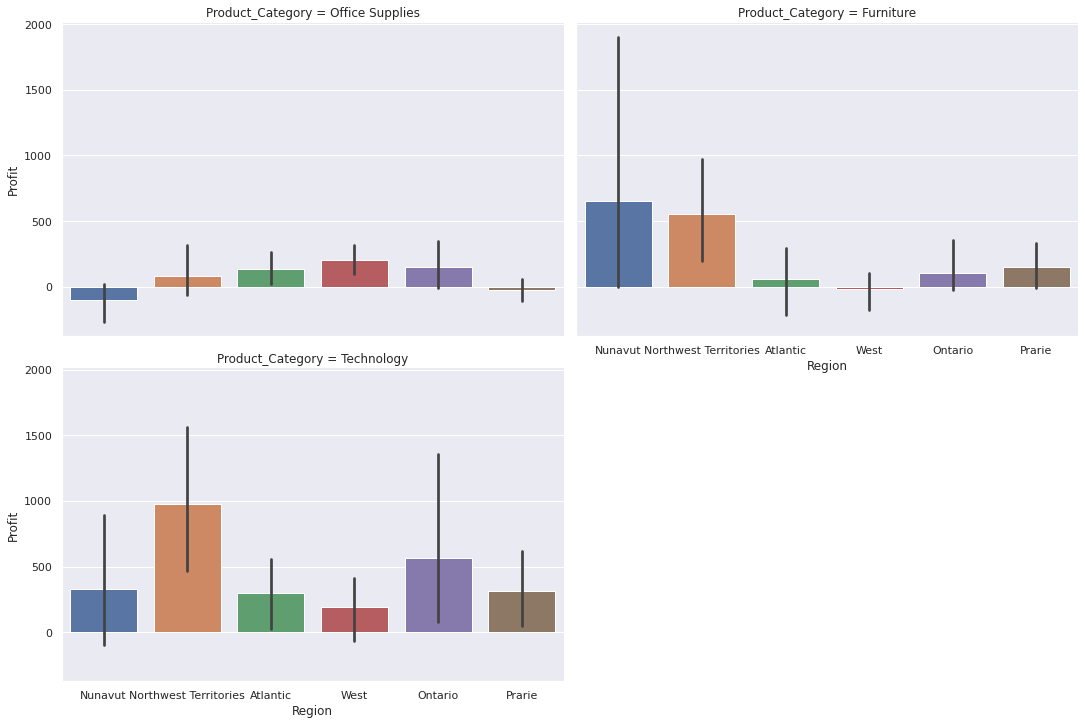

In [52]:

#Profit vs Region by Product Category 
ax = sns.catplot(x ='Region', y ='Profit', data=sales, kind='bar', col="Product_Category", col_wrap=2, height=5, aspect=1.5)

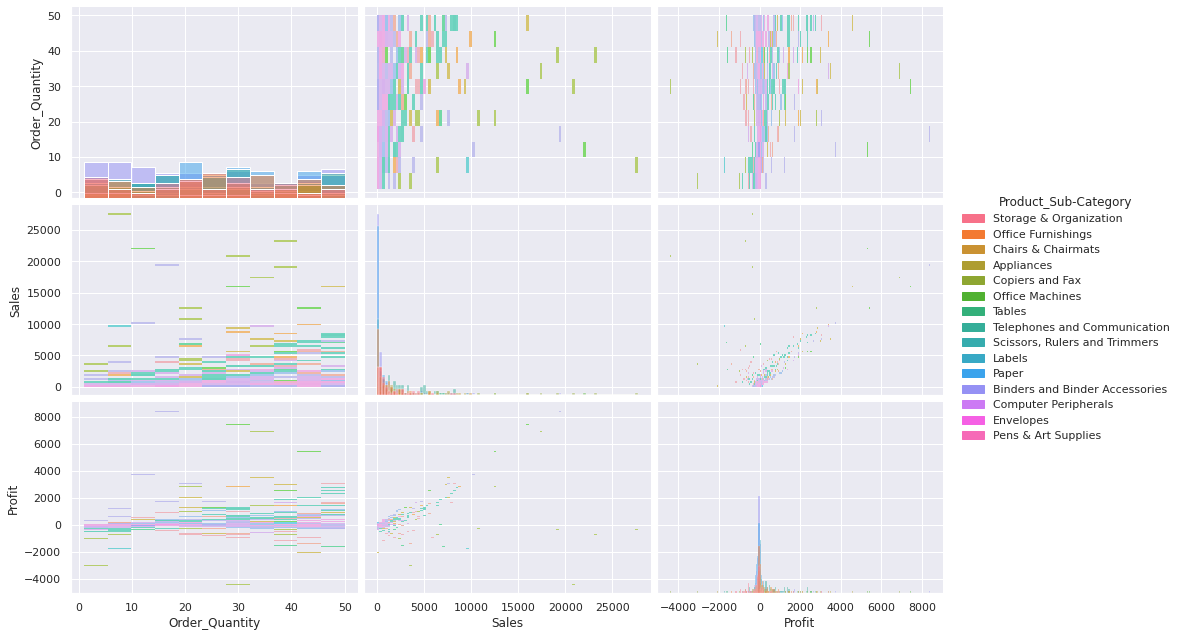

In [53]:
#Pairwise by sub category
ax = sns.pairplot(data=pairnums, hue="Product_Sub-Category", kind="hist", height=3, aspect=1.5)

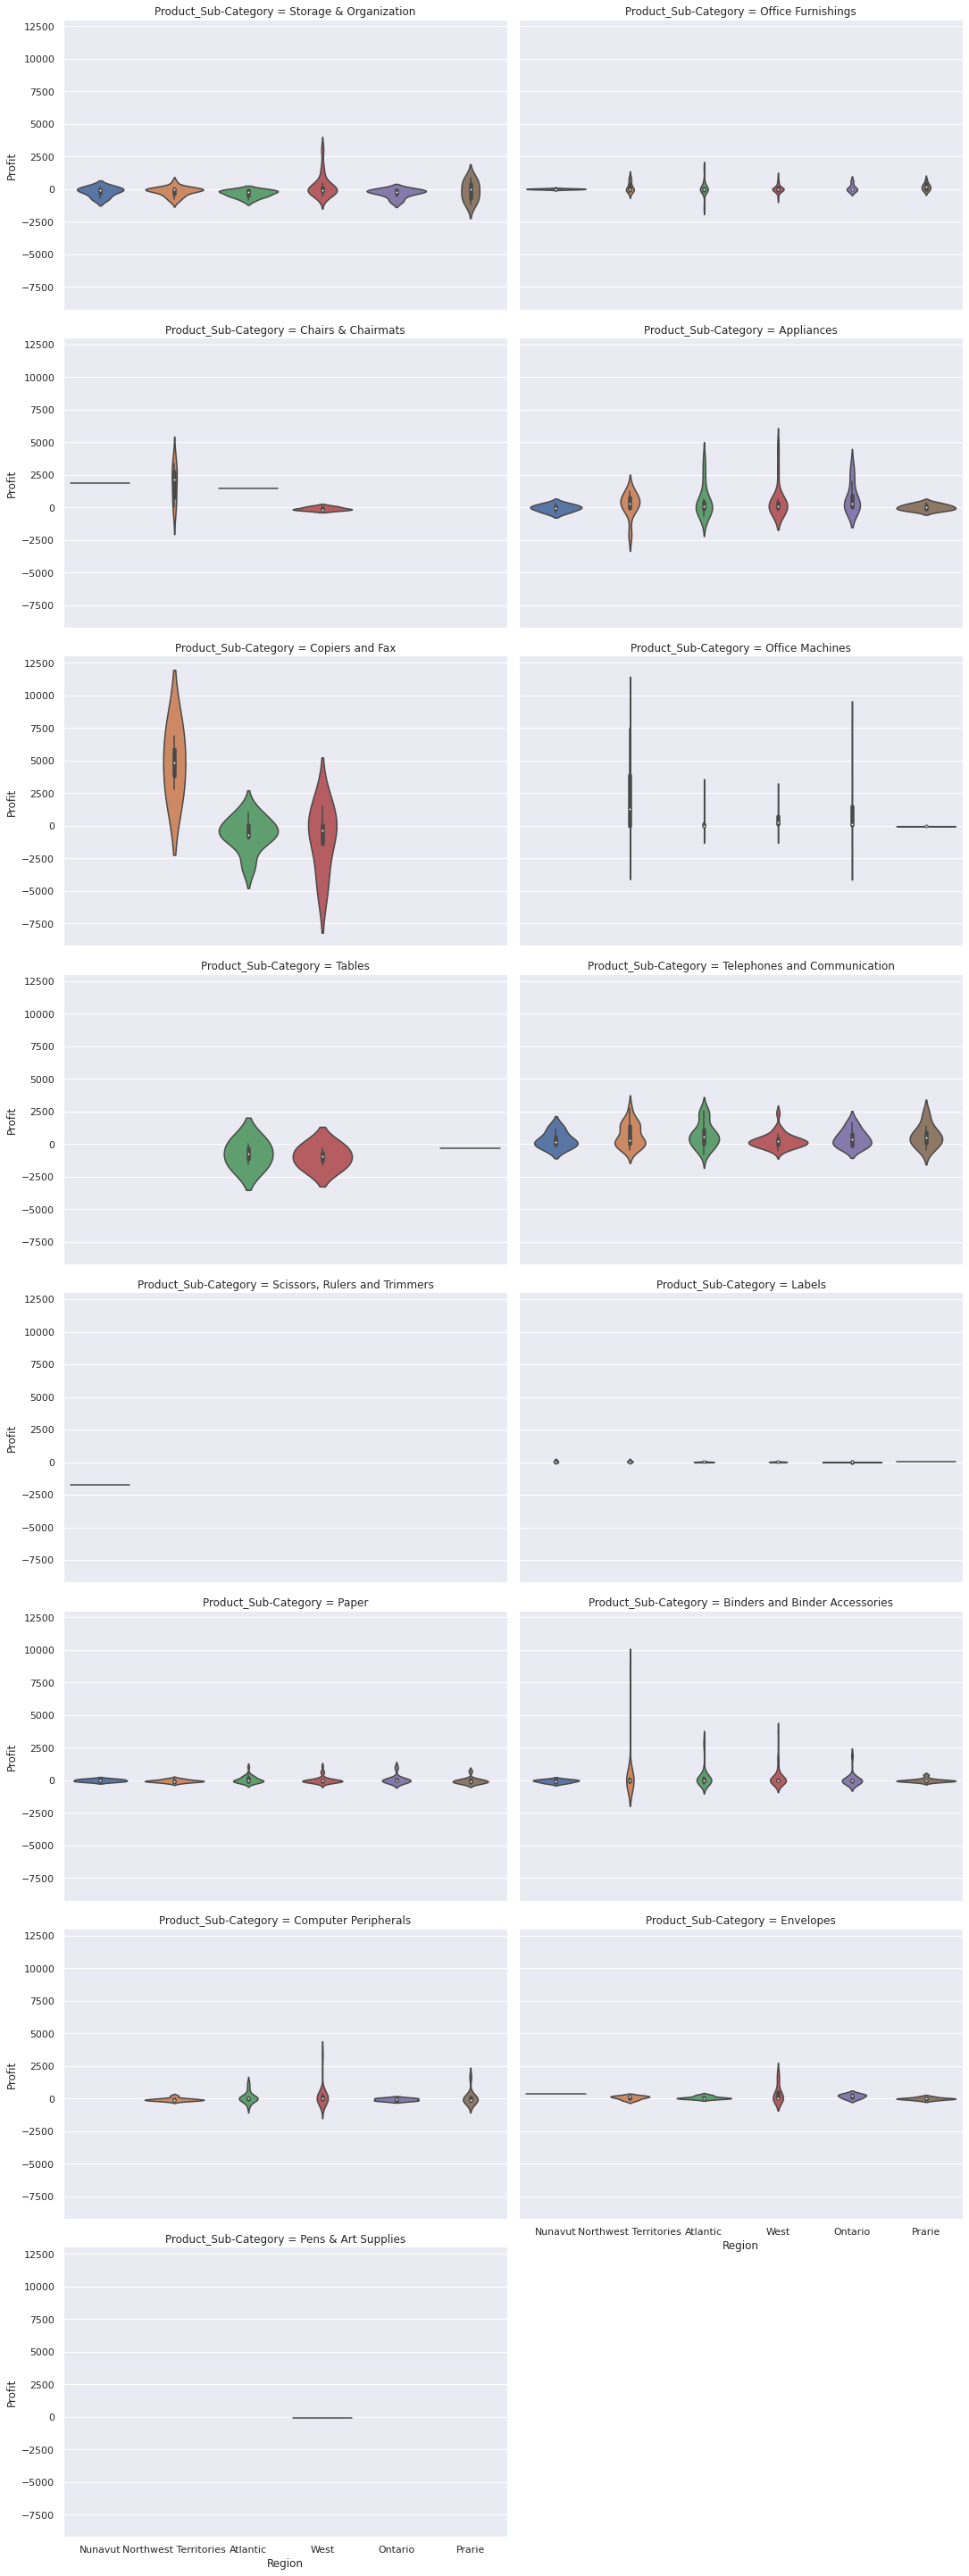

In [54]:
#The majority of orders come from the West Region
#Profit vs Region by Product Sub-Category 
ax = sns.catplot(x ='Region', y ='Profit', data=sales, kind='violin', col="Product_Sub-Category", col_wrap=2, height=5, aspect=1.5)

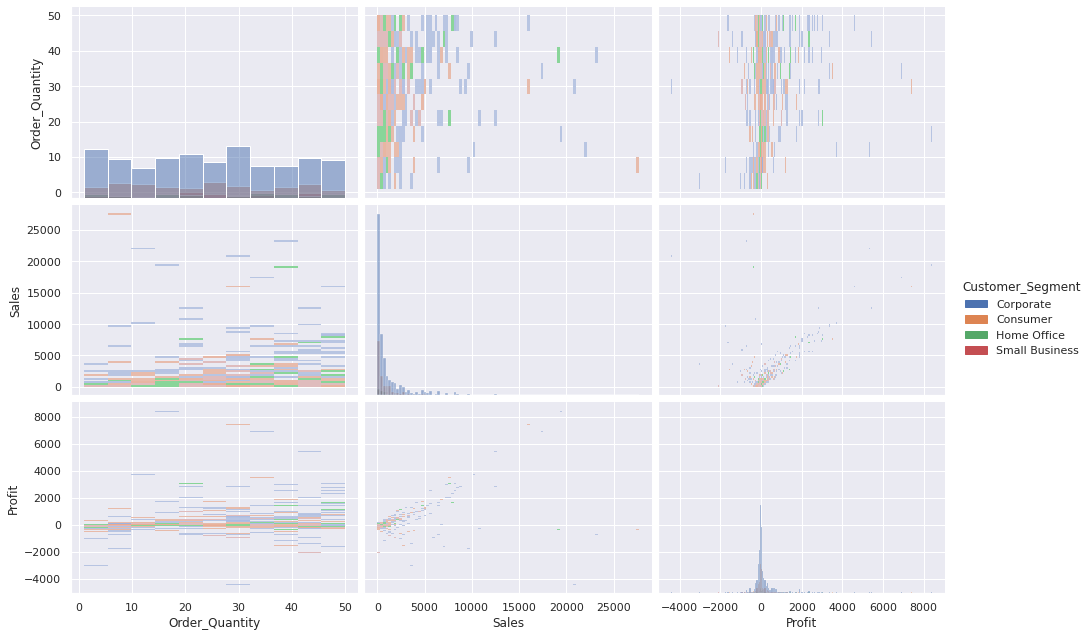

In [55]:
#Majority of Orders were from Corporate
#Pairwise Customer Segment
ax = sns.pairplot(data=pairnums, hue="Customer_Segment", kind="hist", height=3, aspect=1.5)

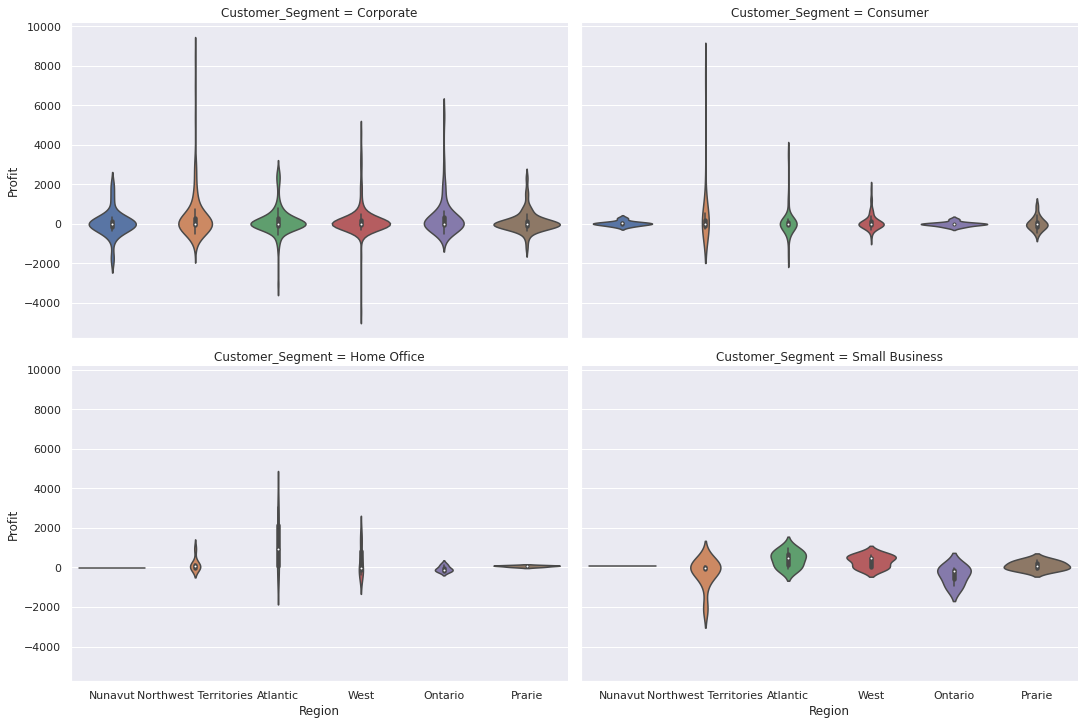

In [56]:
#Profit vs Region by Customer Segment
ax = sns.catplot(x ='Region', y ='Profit', data=sales, kind='violin', col="Customer_Segment", col_wrap=2, height=5, aspect=1.5)

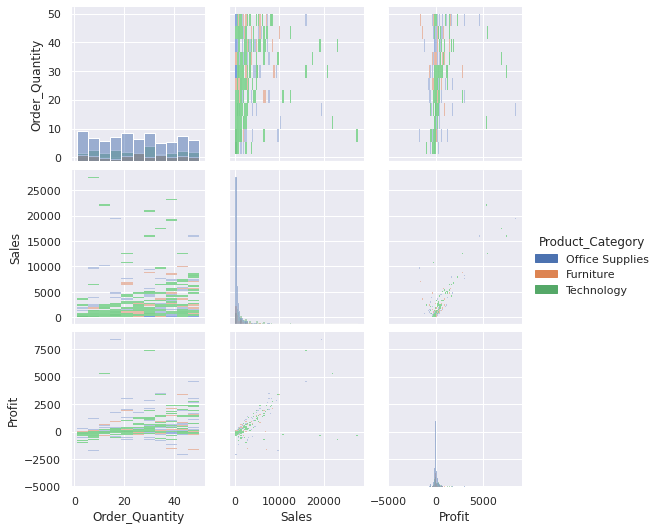

In [57]:
#Majority of orders were for Office Supplies
#Pairwise Product Categories
ax = sns.pairplot(data=pairnums, hue="Product_Category", kind='hist')

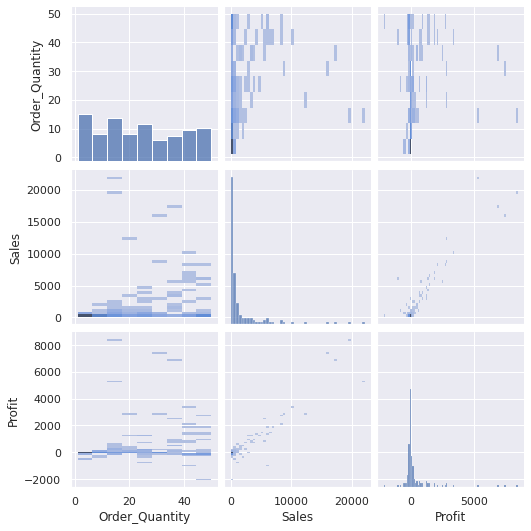

In [58]:
#Highest profits were seen from Northwest Territories
#Northwest pairwise
north = sales.loc[sales['Region'] == 'Northwest Territories'].drop(["Order_ID"], axis=1)
ax = sns.pairplot(data=north, kind="hist")

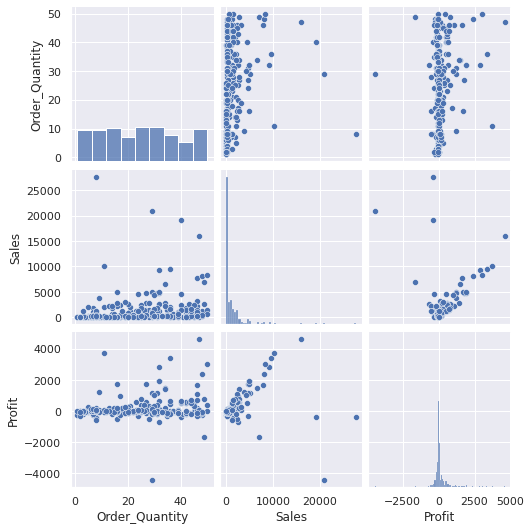

In [59]:
#The majority of orders come from the West Region
#West  pairwise
west = sales.loc[sales['Region'] == 'West'].drop(["Order_ID"], axis=1)
ax = sns.pairplot(data=west)